the value of A matrix is : 
 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
the value of b vector is 
: [-0.05    0.0509  0.0016  0.0021  0.0024  0.0025  0.0024  0.0021  0.0016
 -0.0191  0.02  ]
The value of Q1 is: 
[-0.05    -0.05125 -0.0516  -0.05035 -0.047   -0.04125 -0.033   -0.02235
 -0.0096   0.00475  0.02   ]


Error for cycle 1 is: 
0.00036082587559649185


The value of Q2 is: 
[-0.05       -0.05065625 -0.05119375 -0.05150625 -0.0515     -0.05109375
 -0.05021875 -0.04881875 -0.04685    -0.04428125 -0.04109375 -0.037

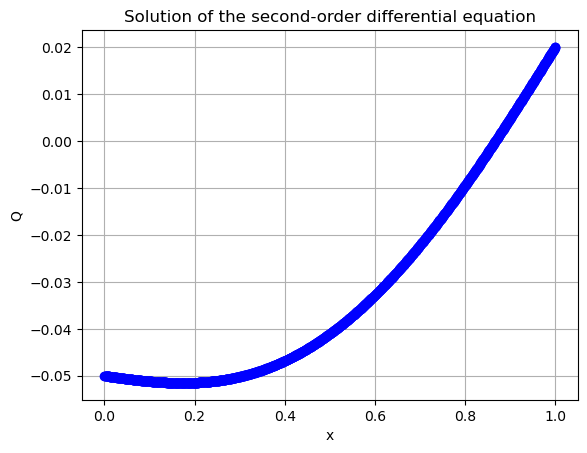

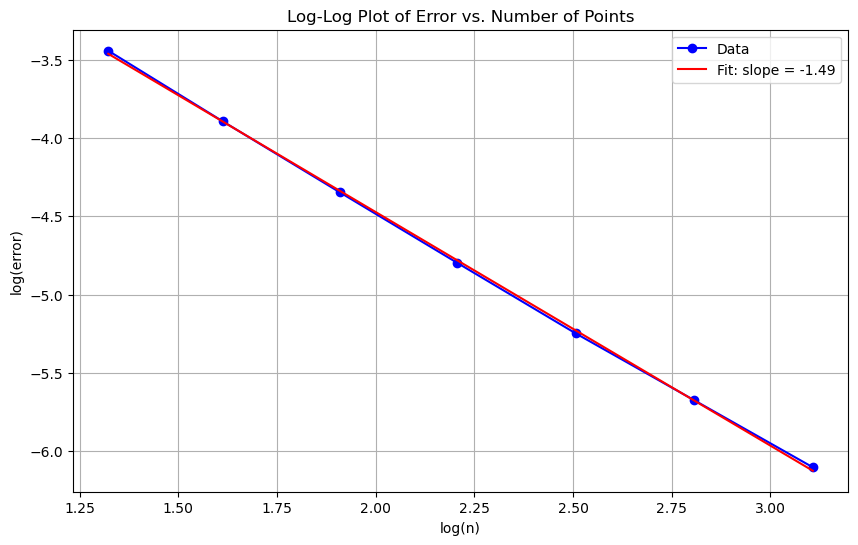

In [1]:
# Subject : analysis 
# Student : M.Maharati , 402126082
# Professor : H.Naderan

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import cg
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Part1: Definition of governing equations

Q_l = -0.05
Q_r = 0.02
loop_n = 7

### Part2: Discretization of the domain

n = 11
L = 1
h = L / (n - 1)

### Part3: Discretization of equations

### Part4: Converting the obtained equations into linear equations (making a sparse matrix)

def solver(Q_l=-0.05, Q_r=0.02, n=11):
    L = 1  # Domain length
    h = L / (n - 1)
    x = np.linspace(0, L, n)
    s = 100 * x * (1 - x)
    diagonals = [
        np.ones(n - 1),             # 1 * u[i+1]
        -2 * np.ones(n),            # -2 * u[i]
        np.ones(n - 1)              # 1 * u[i-1]
    ]
    A = diags(diagonals, offsets=[-1, 0, 1], format='lil')
    
    # Inserting B.C. to matrix A
    A[0, :] = 0
    A[0, 0] = 1
    A[1, 0] = 0
    A[-1, :] = 0
    A[-1, -1] = 1
    A[-2, -1] = 0
    A = A.tocsr()
    
    # Define matrix b
    b = np.zeros(n)
    b[0] = Q_l
    b[-1] = Q_r
    b[1:-1] = h**2 * x[1:-1] * (1 - x[1:-1])
    b[1] -= Q_l
    b[-2] -= Q_r
    
    return x, A, b

### Part5: Solving the initial system using CG

x, A, b = solver(Q_l, Q_r, n)
print("the value of A matrix is : \n", A.toarray())
print(f"the value of b vector is \n: {b}")
Q_interior, exitCode = cg(A, b, atol=1e-5)
if exitCode != 0:
    print("CG did not converge")

# Initialize Q and set boundary conditions
Q = np.zeros(n)
Q[0] = Q_l
Q[1:-1] = Q_interior[1:-1]
Q[-1] = Q_r

print(f'The value of Q1 is: \n{Q}\n\n')

### Part6: Iterative Refinement and Error Calculation
errors = []
n_values = []

for i in range(loop_n):
    n_new = ((n - 1) * 2) + 1
    x, A, b = solver(Q_l, Q_r, n_new)
    Q_new, _ = cg(A, b)
    
    # Calculate error after updating Q and Q_new
    e = np.sqrt(np.sum((Q - Q_new[::2]) ** 2))  # Use step size 2 for mapping to coarse grid

    print(f'Error for cycle {i + 1} is: \n{e}\n\n')
    n_values.append(n_new)
    n = n_new
    Q = Q_new  # Update Q for the next iteration
    print(f'The value of Q{i + 2} is: \n{Q}\n\n')
    
    # Store error for later analysis
    errors.append(e)

# Calculate logarithms of n_values and errors
log_n_values = np.log10(n_values)
log_errors = np.log10(errors)

# Perform linear regression to find the slope
slope, intercept, r_value, p_value, std_err = linregress(log_n_values, log_errors)
print(f'Slope of the log-log plot: {slope}')

### Part7: Result with plotting

plt.figure()
plt.plot(x, Q, marker='o', linestyle='-', color='b')
plt.xlabel('x')
plt.ylabel('Q')
plt.title('Solution of the second-order differential equation')
plt.grid(True)
plt.show()

### Part8: Log-Log Plot of Error vs. Number of Points

plt.figure(figsize=(10, 6))
plt.plot(log_n_values, log_errors, marker='o', linestyle='-', color='b', label='Data')
plt.plot(log_n_values, intercept + slope * log_n_values, 'r', label=f'Fit: slope = {slope:.2f}')
plt.xlabel('log(n)')
plt.ylabel('log(error)')
plt.title('Log-Log Plot of Error vs. Number of Points')
plt.legend()
plt.grid(True)
plt.show()


https://github.com/mtmoein/CFD